In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load the dataset
df = pd.read_csv('/content/ULTRACEMCO.csv')

In [3]:
# Display first few rows
print(df.head())

         Date      Symbol Series  Prev Close    Open    High     Low    Last  \
0  2004-08-24  ULTRACEMCO     EQ       10.00  305.00  340.00  253.25  259.00   
1  2004-08-25  ULTRACEMCO     EQ      260.20  262.00  264.70  249.20  255.00   
2  2004-08-26  ULTRACEMCO     EQ      255.55  257.75  272.50  256.00  270.10   
3  2004-08-27  ULTRACEMCO     EQ      270.70  272.00  272.55  260.65  261.35   
4  2004-08-30  ULTRACEMCO     EQ      262.25  263.70  269.00  262.05  267.00   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  260.20  268.80  6633956  1.783237e+14     NaN              970249   
1  255.55  255.54  2794161  7.140107e+13     NaN              584835   
2  270.70  267.00  2340926  6.250231e+13     NaN              443707   
3  262.25  264.40   915106  2.419529e+13     NaN              222763   
4  266.10  265.38   387417  1.028108e+13     NaN               84031   

   %Deliverble  
0       0.1463  
1       0.2093  
2       0.1895  
3       0.2434  
4

In [4]:
# Display basic statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  4140.000000  4140.000000  4140.000000  4140.000000  4140.000000   
mean   2149.412331  2152.617633  2182.208889  2121.329191  2150.547174   
std    1523.672869  1526.122210  1542.575320  1508.295746  1524.576526   
min      10.000000   256.000000   262.150000   245.250000   253.000000   
25%     847.812500   848.987500   864.975000   830.000000   849.000000   
50%    1740.100000  1749.975000  1767.000000  1720.200000  1742.000000   
75%    3679.162500  3676.350000  3729.287500  3631.637500  3683.837500   
max    6971.250000  7040.000000  7055.950000  6840.000000  7040.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  4140.000000  4140.000000  4.140000e+03  4.140000e+03    2456.000000   
mean   2150.926570  2151.959976  2.476179e+05  7.259128e+13   26078.000407   
std    1524.660937  1525.636357  3.793894e+05  1.221163e+14   21219.302379   
min     255.550000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4140 non-null   object 
 1   Symbol              4140 non-null   object 
 2   Series              4140 non-null   object 
 3   Prev Close          4140 non-null   float64
 4   Open                4140 non-null   float64
 5   High                4140 non-null   float64
 6   Low                 4140 non-null   float64
 7   Last                4140 non-null   float64
 8   Close               4140 non-null   float64
 9   VWAP                4140 non-null   float64
 10  Volume              4140 non-null   int64  
 11  Turnover            4140 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4140 non-null   int64  
 14  %Deliverble         4140 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.3

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4135,2021-04-26,ULTRACEMCO,EQ,6067.90,6131.8,6293.0,6111.25,6270.00,6275.90,6241.84,697792,4.355504e+14,75412.0,184834,0.2649
4136,2021-04-27,ULTRACEMCO,EQ,6275.90,6279.0,6345.9,6235.00,6324.00,6326.80,6300.50,512910,3.231589e+14,59349.0,155832,0.3038
4137,2021-04-28,ULTRACEMCO,EQ,6326.80,6360.0,6405.0,6280.00,6361.55,6360.80,6356.12,414435,2.634198e+14,39443.0,101439,0.2448
4138,2021-04-29,ULTRACEMCO,EQ,6360.80,6420.0,6447.3,6320.40,6410.00,6382.45,6379.16,406869,2.595481e+14,37603.0,72728,0.1788
4139,2021-04-30,ULTRACEMCO,EQ,6382.45,6380.0,6424.0,6233.55,6253.10,6278.95,6340.57,475175,3.012878e+14,38753.0,192320,0.4047


In [8]:
df.shape

(4140, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1684
Deliverable Volume       0
%Deliverble              0
dtype: int64


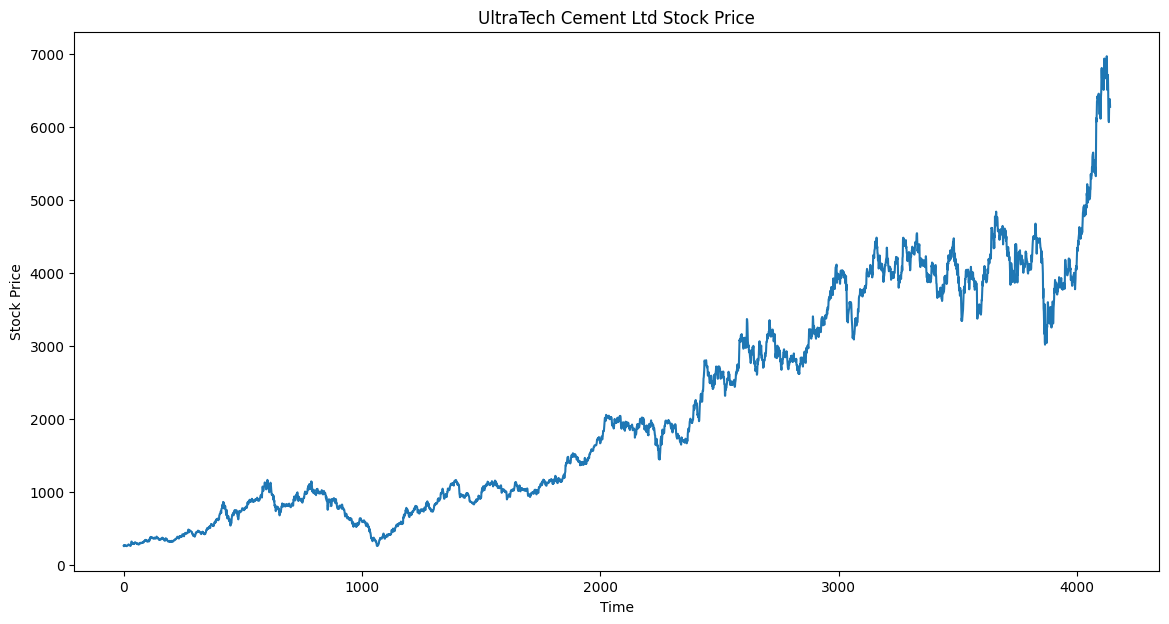

In [10]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('UltraTech Cement Ltd Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [11]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

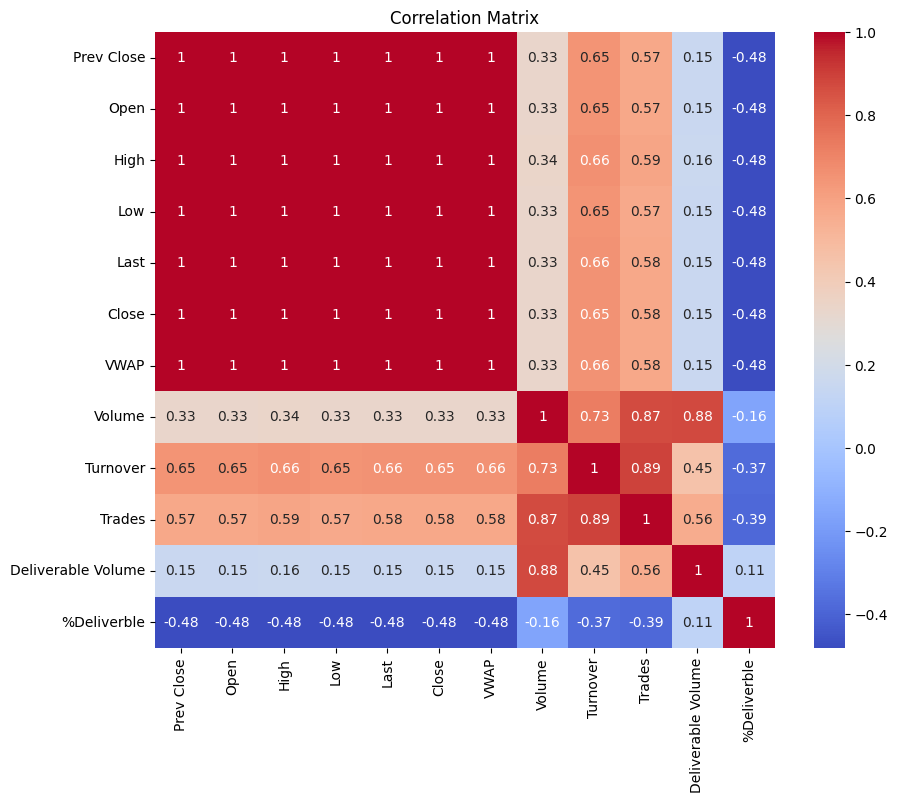

In [13]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

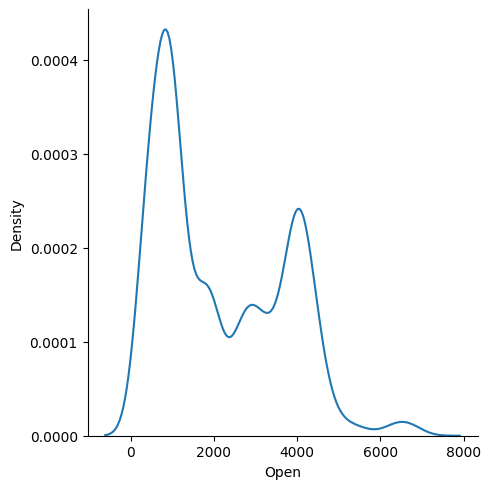

In [14]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

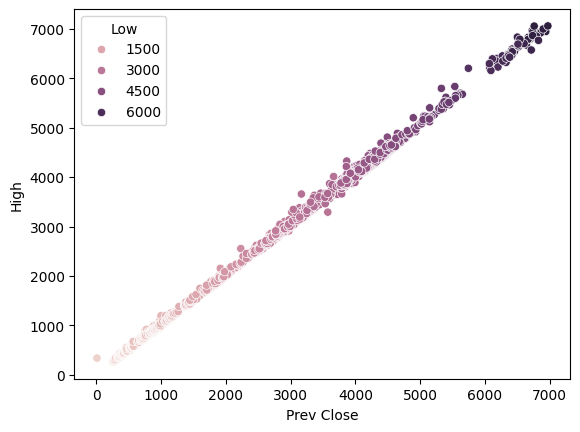

In [15]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

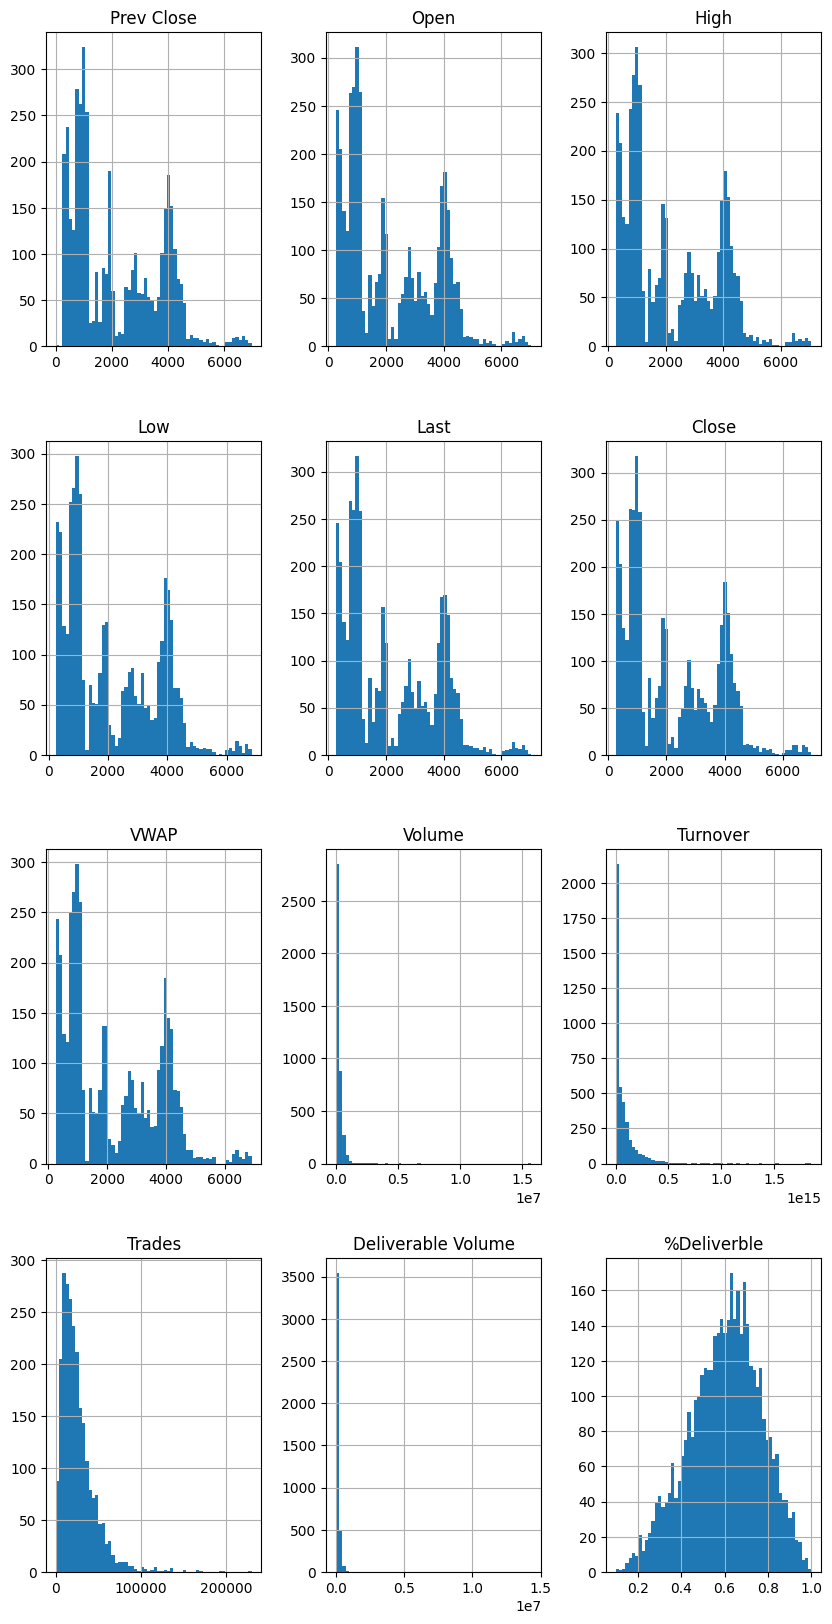

In [16]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

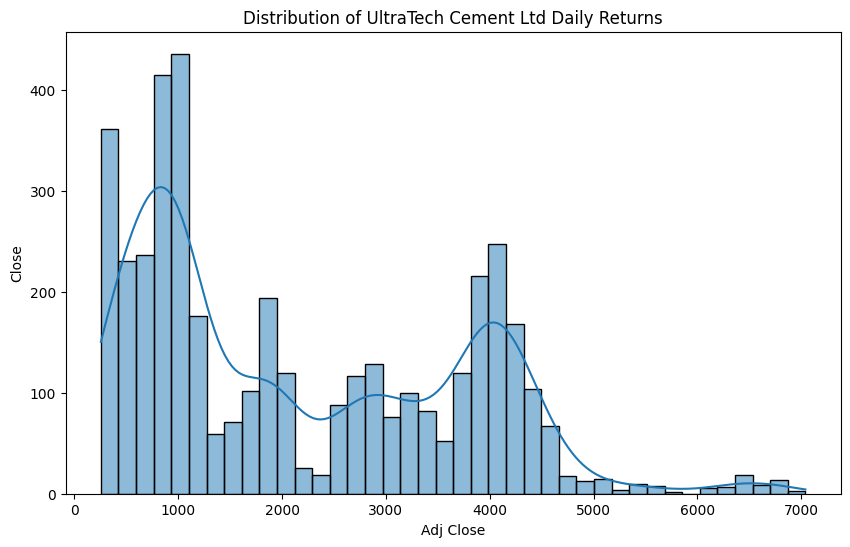

In [17]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of UltraTech Cement Ltd Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

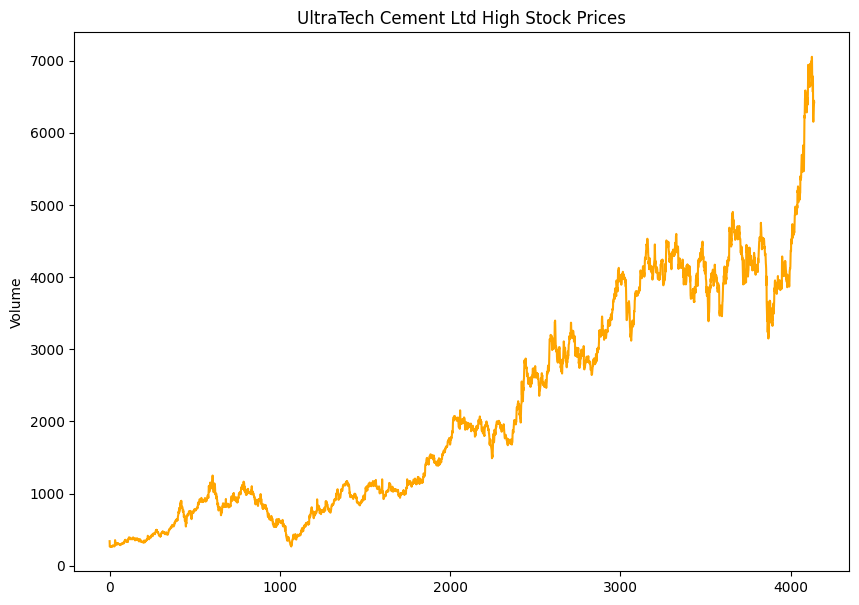

In [18]:
# Plot UltraTech Cement Ltd High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='UltraTech Cement Ltd '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

volume_analysis(df,'High')

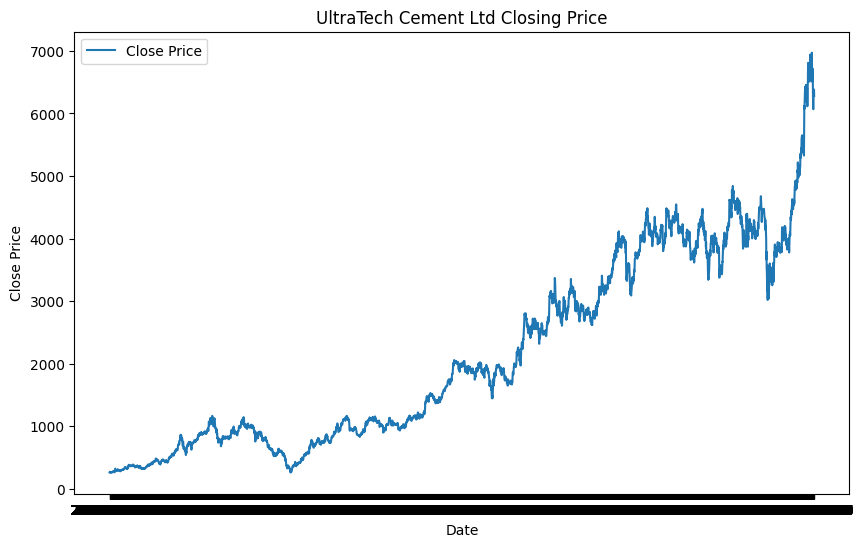

In [19]:
# Plotting the closing price
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('UltraTech Cement Ltd Closing Price')
plt.legend()
plt.show()

In [20]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Step 3: Data Preprocessing and Splitting**

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [22]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date
df = df.sort_values('Date')

# Reset the index
df.reset_index(drop=True, inplace=True)

# Select features (using Close price as the target)
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]

In [23]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(features)

In [24]:
# Define the target variable
target = df['Close']

In [25]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
train_target, test_target = target[:train_size], target[train_size:]

**Step 4: Comparing and Predicting with differnt Models**

**Long Short-Term Memory (LSTM)**

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [27]:
# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 3])  # Closing price is the target
    return np.array(X), np.array(y)

In [28]:
# Create the dataset
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [29]:
# Reshape the input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

3211/3211 [==============================] - 166s 50ms/step - loss: 5.1928e-04


In [33]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 [==============================] - 1s 49ms/step


In [34]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], 4))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], 4))), axis=1))[:,0]

In [35]:
# Evaluate the model
train_score = np.sqrt(np.mean(np.square(y_train - train_predict)))
test_score = np.sqrt(np.mean(np.square(y_test - test_predict)))
print(f'Train RMSE: {train_score}')
print(f'Test RMSE: {test_score}')

Train RMSE: 1888.8741989606426
Test RMSE: 4024.651693110055


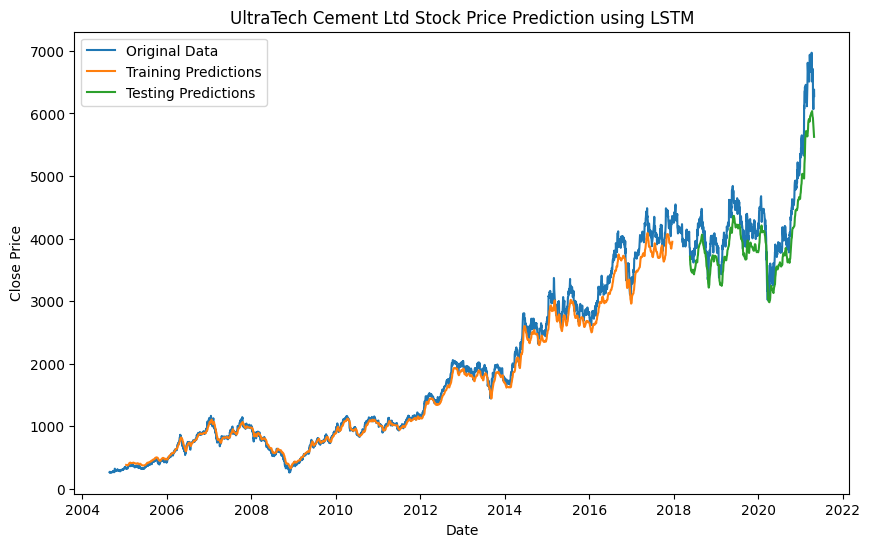

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the lengths match exactly for plotting
train_dates = df['Date'][time_step:time_step+len(train_predict)]
test_dates = df['Date'][train_size+time_step:train_size+time_step+len(test_predict)]

# Plotting the results
plt.figure(figsize=(10,6))

# Plot the original data
plt.plot(df['Date'], df['Close'], label='Original Data')

# Plot the training predictions
plt.plot(train_dates, train_predict, label='Training Predictions')

# Plot the testing predictions
plt.plot(test_dates, test_predict, label='Testing Predictions')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('UltraTech Cement Ltd Stock Price Prediction using LSTM')
plt.legend()
plt.show()

**Support Vector Regression (SVR)**

In [47]:
from sklearn.svm import SVR

In [48]:
# Train the SVR model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(train_data[:, :-1], train_target)

# Predictions
svr_train_predict = svr_rbf.predict(train_data[:, :-1])
svr_test_predict = svr_rbf.predict(test_data[:, :-1])

In [49]:
# Evaluate the model
train_score = np.sqrt(np.mean(np.square(train_target - svr_train_predict)))
test_score = np.sqrt(np.mean(np.square(test_target - svr_test_predict)))
print(f'SVR Train RMSE: {train_score}')
print(f'SVR Test RMSE: {test_score}')

SVR Train RMSE: 15.814542059227556
SVR Test RMSE: 147.1149514166677


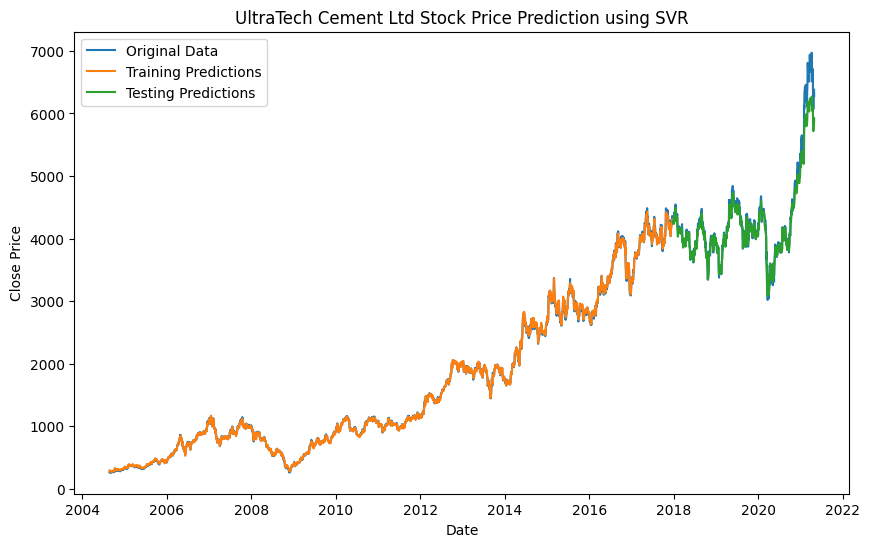

In [50]:
# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Original Data')
plt.plot(df['Date'][:train_size], svr_train_predict, label='Training Predictions')
plt.plot(df['Date'][train_size:], svr_test_predict, label='Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('UltraTech Cement Ltd Stock Price Prediction using SVR')
plt.legend()
plt.show()

**K-Nearest Neighbors (KNN)**

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [52]:
# Train the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(train_data[:, :-1], train_target)

# Predictions
knn_train_predict = knn.predict(train_data[:, :-1])
knn_test_predict = knn.predict(test_data[:, :-1])

In [53]:
# Evaluate the model
train_score = np.sqrt(np.mean(np.square(train_target - knn_train_predict)))
test_score = np.sqrt(np.mean(np.square(test_target - knn_test_predict)))
print(f'KNN Train RMSE: {train_score}')
print(f'KNN Test RMSE: {test_score}')

KNN Train RMSE: 6.865461866216539
KNN Test RMSE: 583.4221736752814


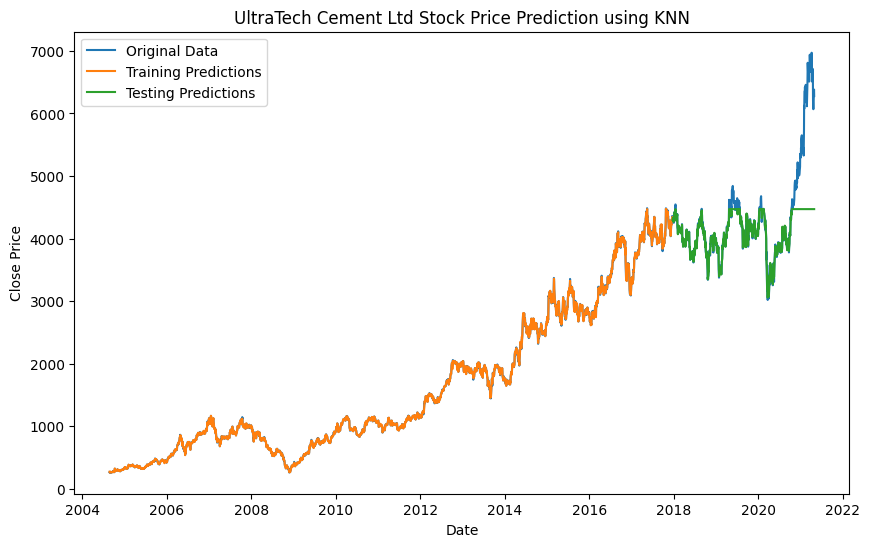

In [54]:
# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Original Data')
plt.plot(df['Date'][:train_size], knn_train_predict, label='Training Predictions')
plt.plot(df['Date'][train_size:], knn_test_predict, label='Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('UltraTech Cement Ltd Stock Price Prediction using KNN')
plt.legend()
plt.show()

**K-means Clustering**

In [55]:
from sklearn.cluster import KMeans

In [56]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


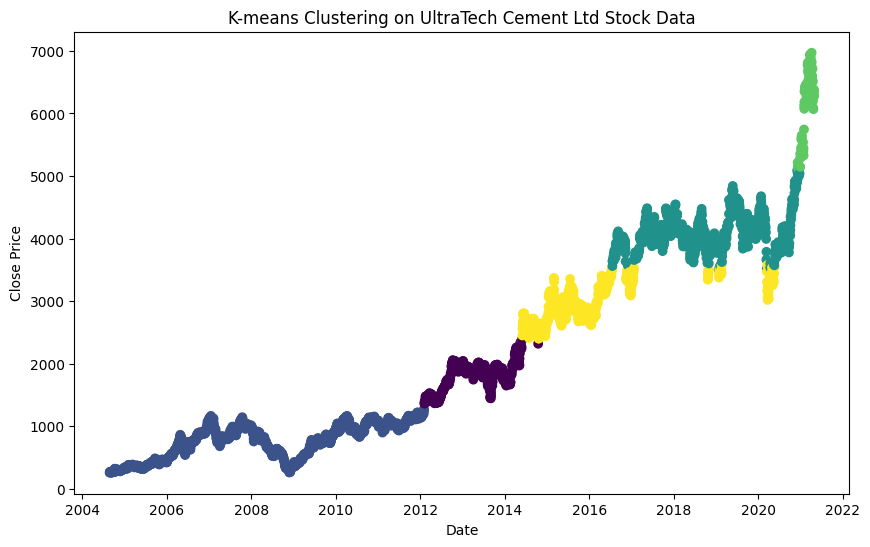

In [57]:
# Plotting clusters
plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Close'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('K-means Clustering on UltraTech Cement Ltd Stock Data')
plt.show()